<a href="https://colab.research.google.com/github/shareefat/Deep_learning_Projects/blob/main/Chern_predictions_using_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [116]:
import pandas as pd
df=pd.read_csv('/content/customer_churn.csv')
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [117]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [118]:
df.shape

(7043, 21)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [120]:
df.drop(['customerID'],axis=1,inplace=True)

Label encoding

In [121]:
!pip install category-encoders

In [122]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [123]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [124]:
from category_encoders import OrdinalEncoder
object_columns = df.select_dtypes(include=['object']).columns
encoder = OrdinalEncoder(cols=object_columns)
df[object_columns] = encoder.fit_transform(df[object_columns])

In [125]:
df.value_counts('TotalCharges')

,count
TotalCharges,
485,11
34,11
128,9
657,8
406,8
...,...
2283,1
2281,1
2280,1


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [127]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,29.85,1,1
1,2,0,2,1,34,2,2,1,2,2,2,1,1,1,2,2,2,56.95,2,1
2,2,0,2,1,2,2,2,1,2,1,1,1,1,1,1,1,2,53.85,3,2
3,2,0,2,1,45,1,1,1,2,2,2,2,1,1,2,2,3,42.30,4,1
4,1,0,2,1,2,2,2,2,1,2,1,1,1,1,1,1,1,70.70,5,2


In [128]:
df['Churn']=df['Churn'].map({2:1,1:0})

In [129]:
x=df.drop('Churn',axis=1)
y=df['Churn']


In [143]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,29.85,1,0
1,2,0,2,1,34,2,2,1,2,2,2,1,1,1,2,2,2,56.95,2,0
2,2,0,2,1,2,2,2,1,2,1,1,1,1,1,1,1,2,53.85,3,1
3,2,0,2,1,45,1,1,1,2,2,2,2,1,1,2,2,3,42.30,4,0
4,1,0,2,1,2,2,2,2,1,2,1,1,1,1,1,1,1,70.70,5,1


In [130]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [131]:
df.shape

(7043, 20)

#model using Keras

In [132]:
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(19, input_shape =(19,), activation='relu'),
                          keras.layers.Dense(15, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [133]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [134]:
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6656 - loss: 3.2805
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6813 - loss: 1.9267
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7325 - loss: 0.9064
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6944 - loss: 1.1306
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7283 - loss: 1.0877
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7148 - loss: 0.9445
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7225 - loss: 1.1105
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7495 - loss: 0.7355
Epoch 9/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7351 - loss: 0.7577
Epoch 10/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7215 - loss: 0.9844
Epoch 11/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6906 - loss: 1.4180
Epoch 12/100
177/177 ━━━━━━━━━━━━━━━━━━━━

In [135]:
model.evaluate(x_test,y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6350 - loss: 0.9734


[1.0198824405670166, 0.6195883750915527]

In [136]:
y_pred=model.predict(x_test)
y_pred[:10]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[4.6972483e-01],
       [2.1366383e-01],
       [3.8119975e-02],
       [9.2204350e-01],
       [7.4756914e-05],
       [4.1268125e-01],
       [5.0994694e-01],
       [4.8833238e-03],
       [3.4023810e-02],
       [6.1197954e-01]], dtype=float32)

In [137]:
y_pred[:10]

array([[4.6972483e-01],
       [2.1366383e-01],
       [3.8119975e-02],
       [9.2204350e-01],
       [7.4756914e-05],
       [4.1268125e-01],
       [5.0994694e-01],
       [4.8833238e-03],
       [3.4023810e-02],
       [6.1197954e-01]], dtype=float32)

In [138]:
y_test[:10]

,Churn
185,1
2715,0
3825,0
1807,1
132,0
1263,1
3732,0
1672,0
811,1
2526,1


In [139]:
y_predictions=[]
for i in y_pred:
  if i>=0.5:
    y_predictions.append(1)
  else:
    y_predictions.append(0)

In [140]:
y_predictions[:10]

[0, 0, 0, 1, 0, 0, 1, 0, 0, 1]

In [141]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predictions)
cm

array([[535, 501],
       [ 35, 338]])

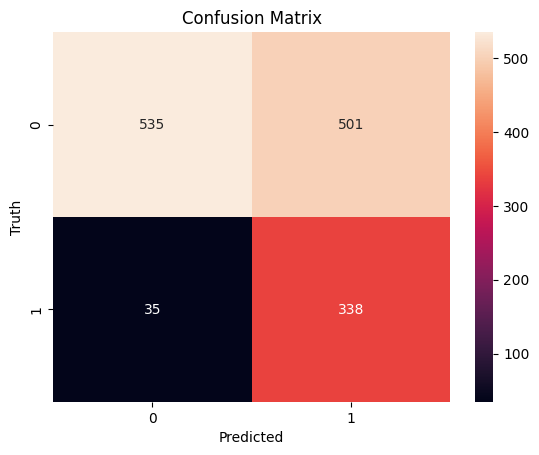

In [144]:
import seaborn as sns
sns.heatmap(cm,annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

#Evaluation

In [157]:
accuracy= (535+338)/(535+501+35+338)
accuracy*100


61.95883605393896

In [158]:
recall=338/(338+501)
recall*100

40.286054827175214

In [159]:
precison=338/(338+35)
precison*100

90.61662198391421

classification report

In [160]:
import numpy as np
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.94      0.52      0.67      1036
           1       0.40      0.91      0.56       373

    accuracy                           0.62      1409
   macro avg       0.67      0.71      0.61      1409
weighted avg       0.80      0.62      0.64      1409

